# Matplotlib, `pie` and `scatter plot`

In [2]:
# Importing Libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Proportion of Work from Home Jobs

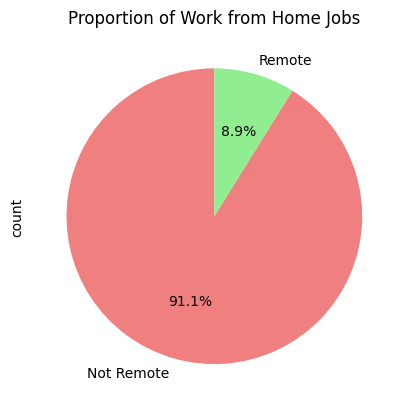

In [3]:
# Plot pie chart for 'job_work_from_home'
df['job_work_from_home'].value_counts().plot(
    kind='pie', 
    startangle=90, 
    autopct='%1.1f%%', 
    labels=['Not Remote', 'Remote'],  # Explicit labels
    colors=['lightcoral', 'lightgreen'],  # Better color contrast
)

# Add title
plt.title("Proportion of Work from Home Jobs")

# Display the plot
plt.show()


## Proportion of Job Features

### This visualization shows the proportion of job postings that offer remote work, require a degree, or provide health insurance.


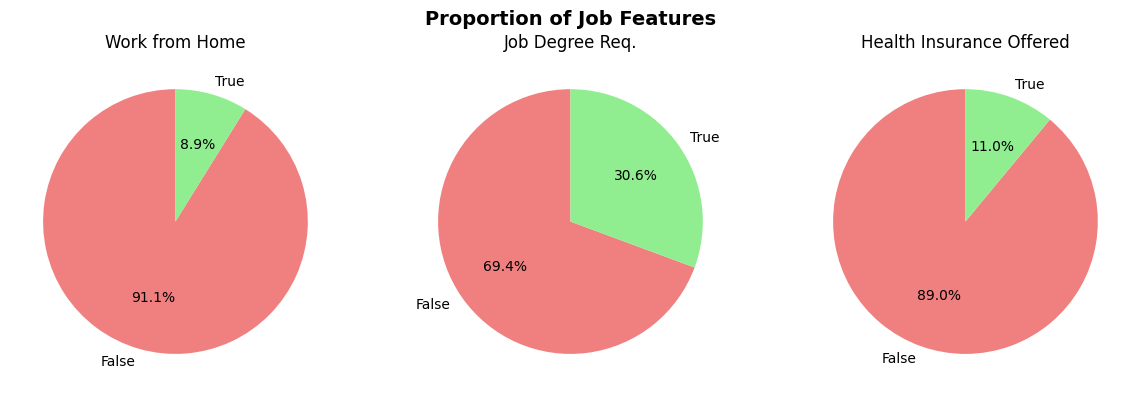

In [4]:
# Dictionary of columns to plot
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create a figure with 1 row, 3 columns
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Loop through each column and plot pie charts
for i, (column, title) in enumerate(dict_column.items()):
    values = df[column].fillna(False).value_counts()  # Handle NaN values
    labels = sorted(df[column].dropna().unique())  # Ensure labels are in correct order
    
    ax[i].pie(values, startangle=90, autopct='%1.1f%%', labels=labels, colors=['lightcoral', 'lightgreen'])
    ax[i].set_title(title)

# Adjust layout for better readability
fig.suptitle("Proportion of Job Features", fontsize=14, fontweight="bold")
fig.tight_layout()

# Show the plot
plt.show()


## Top 10 Most Common Skills for Data Analysts


In [16]:
# Filter Data Analyst jobs and create a copy to avoid warnings
df = df[df['job_title_short'] == 'Data Analyst'].copy()

# Drop NaN values in job_skills before exploding
df_explode = df.dropna(subset=['job_skills']).explode('job_skills')

# Group by job_skills to calculate count and median salary
skill_df = df_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

# Sort by skill_count and keep the top 10
skill_df = skill_df.sort_values(by='skill_count', ascending=False).head(10)

# Display the result
skill_df

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


## Salary vs. Count of Job Postings for Top 10 Skills


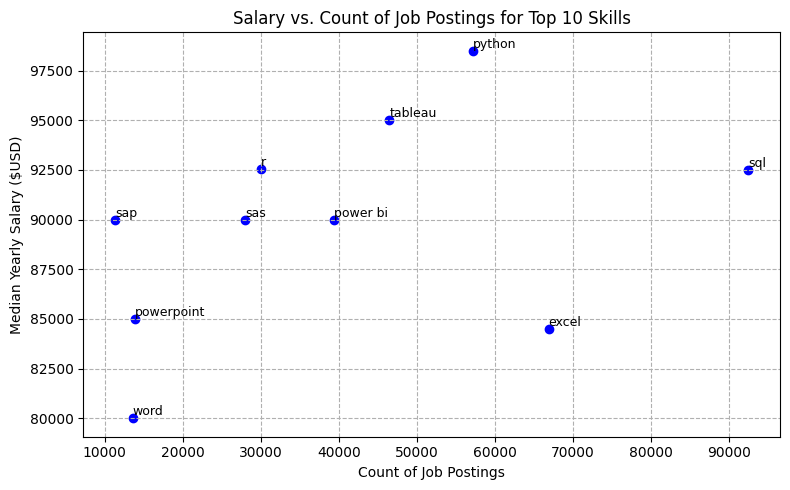

In [ ]:
# Drop NaN values in median_salary if they exist
skill_df = skill_df.dropna(subset=['median_salary'])

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 5))  # Set figure size
ax.scatter(skill_df['skill_count'], skill_df['median_salary'], color='blue')

# Add labels for each point
for i, txt in enumerate(skill_df.index):
    ax.text(skill_df['skill_count'].iloc[i], skill_df['median_salary'].iloc[i], txt, 
            fontsize=9, va='bottom',color='black')

# Add labels and title
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')

# Add grid for better readability
plt.grid(True, linestyle="--")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()